In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from datetime import datetime

In [715]:
df = pd.read_csv('data.csv')

In [716]:
df.shape

(569, 33)

In [717]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


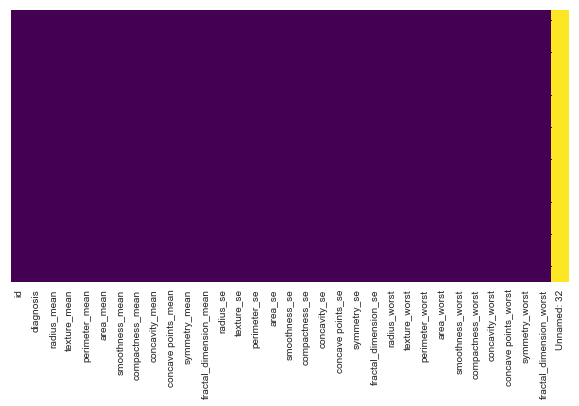

In [718]:
#check missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [719]:
#drop columns
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [720]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Text(0.5,1,'Diagnosis Distribution')

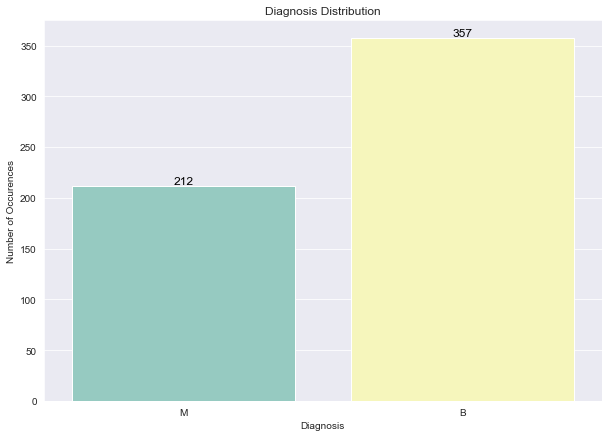

In [721]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
ax = sns.countplot(df['diagnosis'], palette = "Set3")
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.ylabel("Number of Occurences")
plt.xlabel("Diagnosis")
plt.title("Diagnosis Distribution")

In [722]:
means = df[['diagnosis', 'radius_mean', 'texture_mean', 'radius_worst', 'texture_worst']]
means2 = df[['diagnosis', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']]
means3 = df[['diagnosis', 'concave points_mean', 'fractal_dimension_mean']]
melt_means = pd.melt(means, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")
melt_means2 = pd.melt(means2, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")
melt_means3 = pd.melt(means3, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")

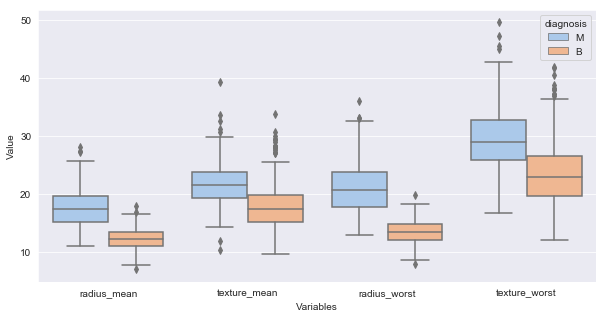

In [723]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "Variables", y = "Value", data = melt_means, hue = 'diagnosis', palette = 'pastel')

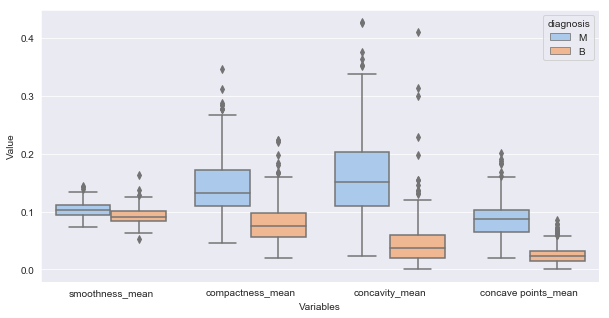

In [724]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "Variables", y = "Value", data = melt_means2, hue = 'diagnosis',  palette = 'pastel')

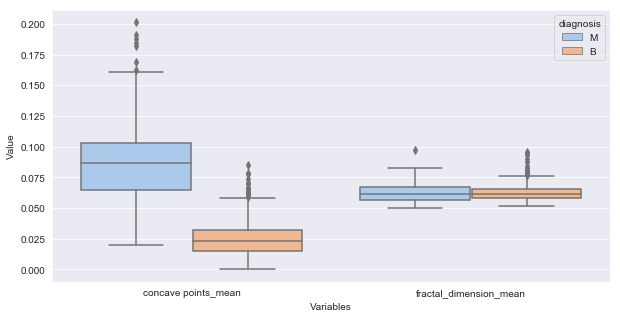

In [725]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "Variables", y = "Value", data = melt_means3, hue = 'diagnosis', palette = 'pastel')

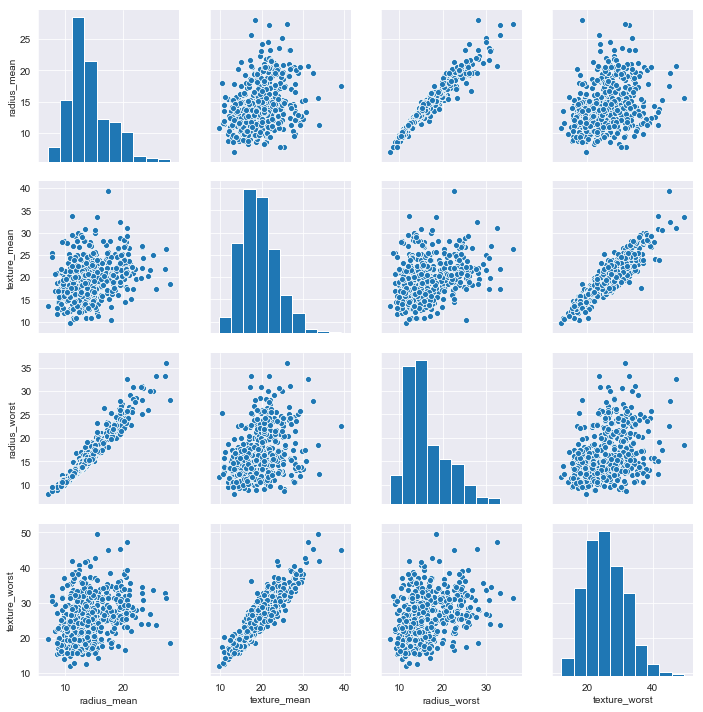

In [726]:
sns.pairplot(means)

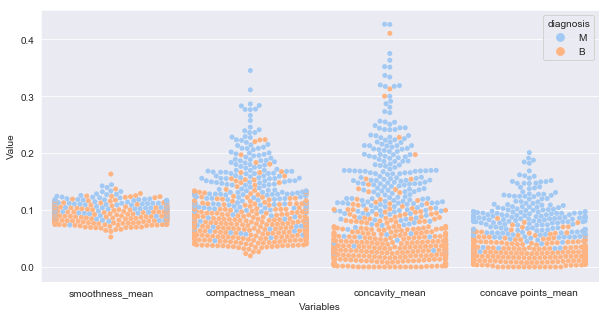

In [727]:
plt.figure(figsize=(10,5))
sns.swarmplot(x = "Variables", y = "Value", data = melt_means2, hue = 'diagnosis', palette = 'pastel')

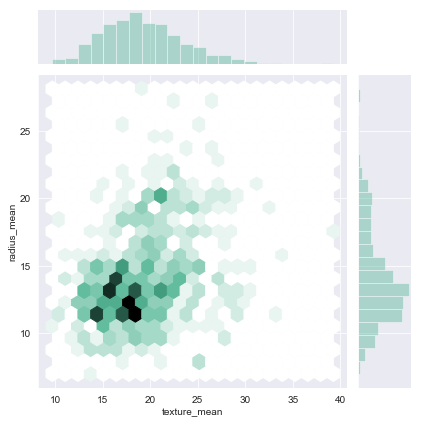

In [728]:
#for any specific relationships
sns.jointplot(x = 'texture_mean', y = 'radius_mean', data = means, kind = 'hex', color = "#4CB391")

In [729]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

m = ols('texture_mean ~ radius_mean', means).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           texture_mean   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     66.40
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.36e-15
Time:                        23:28:24   Log-Likelihood:                -1605.5
No. Observations:                 569   AIC:                             3215.
Df Residuals:                     567   BIC:                             3224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.7070      0.706     19.414      

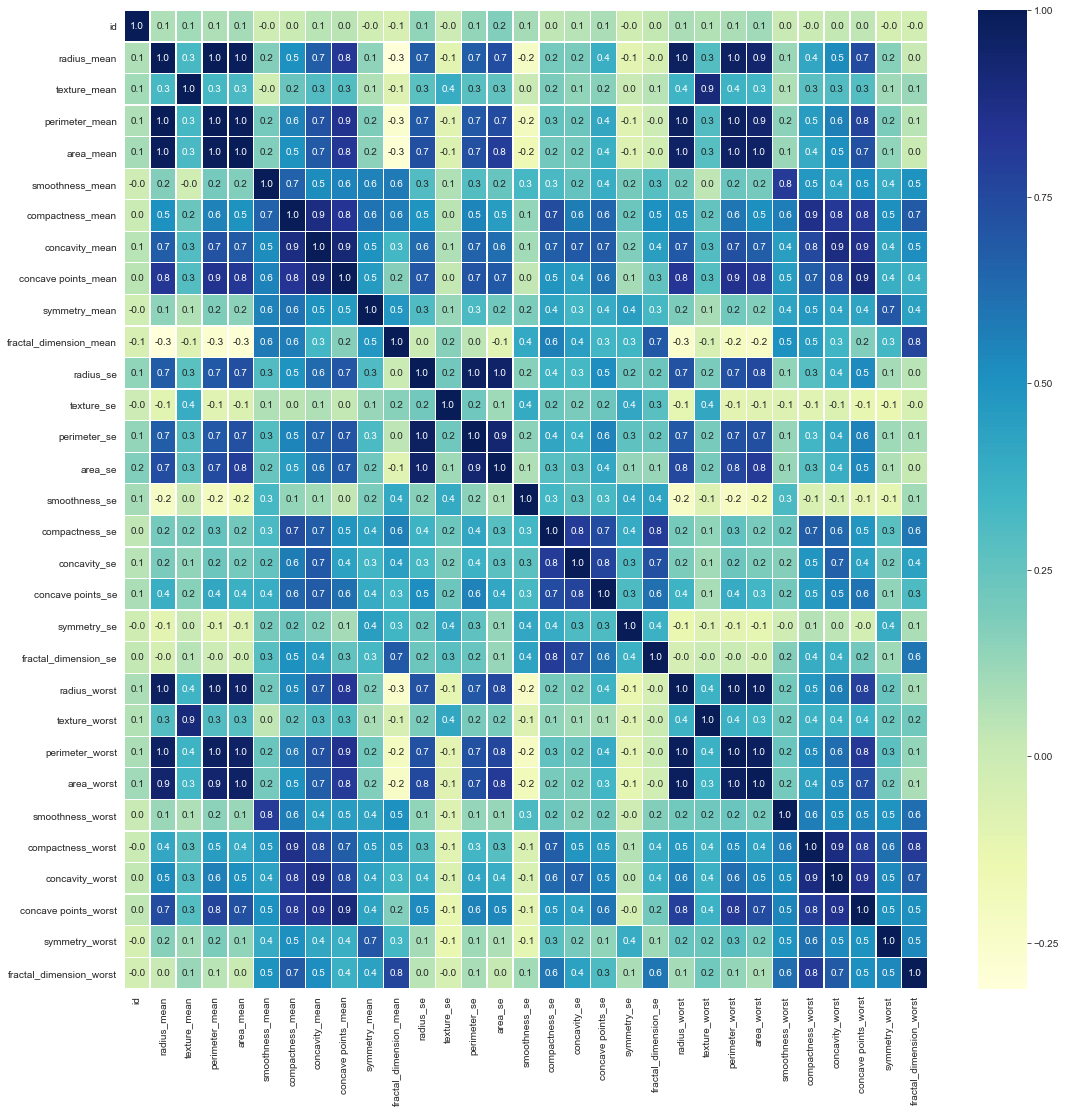

In [730]:
dfcor = df.corr()
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dfcor, cmap = "YlGnBu", annot = True,  fmt = '.1f',lw = .25)

**Import models from sklearn library**

In [731]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score

In [732]:
X = df.drop(['diagnosis','id'], axis = 1)
y = df['diagnosis']

In [733]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [734]:
sf = SelectFromModel(RandomForestClassifier(n_estimators=100))
sf.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [735]:
sf.get_support()

array([False, False, False,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [736]:
print(X_train.columns[sf.get_support()])

Index(['area_mean', 'concavity_mean', 'concave points_mean', 'area_se',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


Re-fit the model

In [737]:
X = df[['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst']]

y = df['diagnosis']

**Applying DecisionTree**

In [738]:
def get_confusionmaxtric(max_leaf_nodes, X_train, X_test, y_train, y_test):
    mo = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    mo.fit(X_train, y_train)
    preds = mo.predict(X_test)
    confusionmaxtric = confusion_matrix(y_test, preds)
    accuracyscore = accuracy_score(y_test, preds)
    return(confusionmaxtric, accuracyscore)

In [739]:
for max_leaf_nodes in np.arange(5,1000,5):
    my_cm = get_confusionmaxtric(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes:{} \n Confusion Matrics: \n{}".format(max_leaf_nodes, my_cm))

Max leaf nodes:5 
 Confusion Matrics: 
(array([[96, 12],
       [11, 52]]), 0.8654970760233918)
Max leaf nodes:10 
 Confusion Matrics: 
(array([[104,   4],
       [  8,  55]]), 0.9298245614035088)
Max leaf nodes:15 
 Confusion Matrics: 
(array([[107,   1],
       [  7,  56]]), 0.9532163742690059)
Max leaf nodes:20 
 Confusion Matrics: 
(array([[107,   1],
       [  7,  56]]), 0.9532163742690059)
Max leaf nodes:25 
 Confusion Matrics: 
(array([[107,   1],
       [  7,  56]]), 0.9532163742690059)
Max leaf nodes:30 
 Confusion Matrics: 
(array([[107,   1],
       [  7,  56]]), 0.9532163742690059)
Max leaf nodes:35 
 Confusion Matrics: 
(array([[107,   1],
       [  7,  56]]), 0.9532163742690059)
Max leaf nodes:40 
 Confusion Matrics: 
(array([[107,   1],
       [  7,  56]]), 0.9532163742690059)
Max leaf nodes:45 
 Confusion Matrics: 
(array([[107,   1],
       [  7,  56]]), 0.9532163742690059)
Max leaf nodes:50 
 Confusion Matrics: 
(array([[107,   1],
       [  7,  56]]), 0.9532163742690

95.32% is the optimal accuracy using decision tree.

**Applying RandomForest**

In [785]:
X = df.drop(['diagnosis','id'], axis = 1)
y = df['diagnosis']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.3, random_state=2)

In [786]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_2, y_train_2)
pre = model.predict(X_test_2)

In [787]:
print(classification_report(y_test_2, pre))
print(confusion_matrix(y_test_2, pre))
accuracy_score(y_test_2,pre)

              precision    recall  f1-score   support

           B       0.98      0.96      0.97       104
           M       0.94      0.97      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.96       171

[[100   4]
 [  2  65]]


0.9649122807017544

In [743]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

Text(0.5,1,'Feature importances')

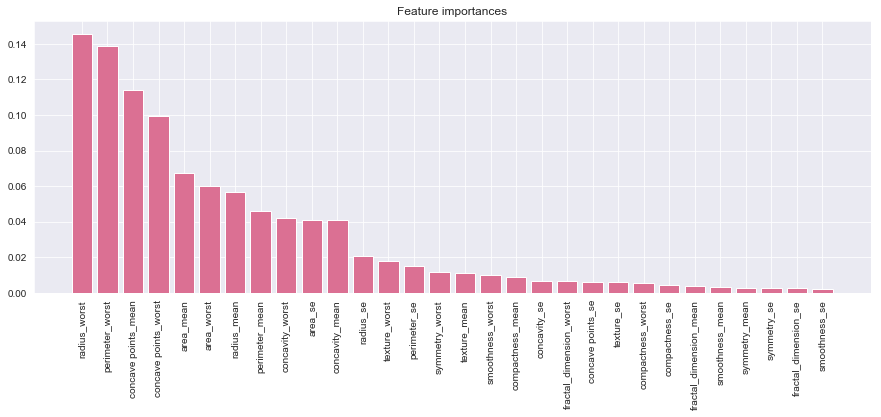

In [744]:
plt.figure(figsize=(15,5))
plt.bar(range(len(indices)), importances[indices], color='#DB7093', align='center')
plt.xticks(range(len(indices)), X_train.columns[indices], rotation=90)
plt.title("Feature importances")

96.49% after applying RandomForest, which is sightly better than Decision Tree

**Applying XGBOOST**

In [795]:
import xgboost as xgb
from xgboost import plot_importance

In [796]:
from sklearn.model_selection import RandomizedSearchCV

In [797]:
z = {'M':1, 'B':0}
X = df.drop(['diagnosis','id'], axis = 1)
y = df['diagnosis'].map(z)

In [798]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.3, random_state=2)

In [799]:
gbm_param_grid = {
    'learning_rate':np.arange(0.01, 1.05, .05),
    'n_estimators': np.arange(1,150,1),
    'subsample':np.arange(0.01, 1.00, .05),
    'gamma':np.arange(0,1,0.001),
    'max_depth': np.arange(1,10,1)}

gbm = xgb.XGBClassifier()

In [800]:
randomized_mse = RandomizedSearchCV(estimator=gbm, 
                                   param_distributions=gbm_param_grid,
                                   n_iter=25, 
                                   scoring='neg_mean_squared_error',
                                   cv=5, verbose=1)

In [801]:
randomized_mse.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.0s finished
/Users/jamiezeng/anaconda2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149]),
                                       

In [802]:
randomized_mse.best_params_

{'subsample': 0.26,
 'n_estimators': 128,
 'max_depth': 4,
 'learning_rate': 0.21000000000000002,
 'gamma': 0.29}

In [803]:
model3 = xgb.XGBClassifier(objective='binary:logistic', 
                           n_estimators=128, 
                           subsample=0.26,
                           seed=123,
                           max_depth=4,
                           learning_rate=0.21,
                           gamma=0.29)

In [804]:
model3.fit(X_train_3, y_train_3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.29,
              learning_rate=0.21, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=128, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=0.26, verbosity=1)

In [805]:
pre = model3.predict(X_test_3)

In [806]:
print(classification_report(pre, y_test_3))
print(confusion_matrix(pre, y_test_3))
accuracy_score(y_test_3,pre)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       103
           1       0.96      0.94      0.95        68

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[100   3]
 [  4  64]]


0.9590643274853801

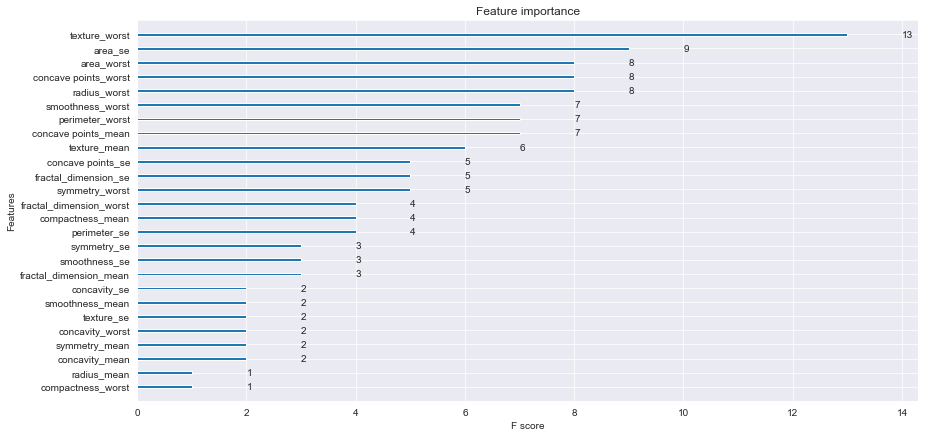

In [808]:
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(model3)

It seems like we have reached the limit of this dataset. 